# TD1: Linear and Polynomial Regressions; Application to Classification

In [4]:
import numpy as np
import scipy.io as sio
import pandas as pd
import matplotlib.pyplot as plt

## Linear and polynomial regression: curve fitting

Let $(X,Y)$ be a pair of real random variable such that $X$ is uniform on $[0,1]$ and $Y = f_*(X)+\sigma \varepsilon$, where $f_*(x) = \sin(6x)$, $\sigma = 0.5$, and $\varepsilon$ is some is a standard Gaussian random variable, independent from $X$. 

(1) Generate $n = 40$ realizations $(x_i, y_i), i = 1, \dots n$ of $(X,Y)$.

In [5]:
n = 40
Xs = np.random.uniform(size=n)
sigma = 0.5
def f_star(x):
    return np.sin(6*x)
Ys = f_star(Xs) + sigma * np.random.randn(n)

(2) Plot the realizations of $(X,Y)$, along with the curve $y = f_*(x)$.

In [6]:
xs = np.linspace(0,1,100)
ys = f_star(xs)

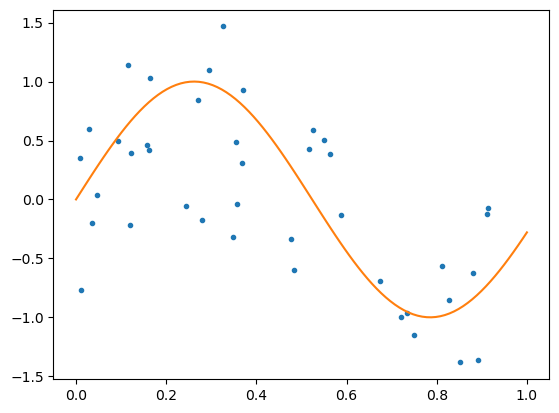

In [7]:
plt.plot(Xs,Ys,'.')
plt.plot(xs,ys)
plt.show()

In this section, we try to learn the function $f_*$ from the $n$ samples. We start with empirical risk minimization over the set of linear functions. 

(3) What are here the input space $\mathcal{X}$ of the linear regression? What is the output space $\mathcal{Y}$? What is the risk $R(f)$ of a classifier $f:\mathcal{X} \to \mathcal{Y}$ in terms of $\sigma$? What is the optimal classifier among all $L^2$ functions $f:\mathcal{X} \to \mathcal{Y}$? (Here optimal means that it minimizes the risk $R(f)$.) What is the risk of the optimal classifier?

\begin{align*}
R(f) &= \mathbb{E}_{(X,Y)}\left[(Y-f(X))^2\right] = \mathbb{E}\left[(f_*(X)+\sigma\varepsilon - f(X))^2\right] \\
&= \mathbb{E}\left[(f_*(X)-f(X))^2\right] + 2\sigma\mathbb{E}\left[\varepsilon(f_*(X)-f(X))\right] + \sigma^2 \mathbb{E}\left[\varepsilon^2\right] \, .
\end{align*}
The second term vanishes because $\varepsilon$ is centered and independent of $X$. We thus get 
\begin{equation*}
R(f) = \int_0^1(f_*(x)-f(x))^2 \mathrm{d}x + \sigma^2 = \Vert f_*-f \Vert_{L^2([0,1],\mathrm{d}x)}^2 + \sigma^2 \, .
\end{equation*}
From this formula, it is clear that the optimal classifier is $f_*$ with risk $R(f_*) = \sigma^2$.

The empirical risk minimization over the set of linear function means that we estimate
$$ \hat{f} = {\rm argmin}_{f \in F} \hat{R}_n(f) $$ 
where 
$$ F = \{f(x) = \theta_1 x + \theta_0 | \theta_0, \theta_1 \in \mathbb{R}\} \, , $$
$$ \hat{R}_n(f) = \frac{1}{n} \sum_{i=1}^{n} (y_i - f(x_i))^2 \, .$$

(4) Writing $\hat{f}(x) = \theta_1 x + \theta_0$, find a closed-from formula for $\theta_0$, $\theta_1$ in terms of the observations $(x_i,y_i)$.

We write the risk $\hat{R}_n(f)$ in term of $\theta_0, \theta_1$ directly:
$$ \hat{R}_n(\theta_0,\theta_1) = \frac{1}{n} \sum_{i=1}^n (y_i-\theta_0-\theta_1x_i)^2 \, .$$ 
This is a non-negative quadratic in $(\theta_0, \theta_1)$, thus the optimum is reached when the gradient vanishes. A few lines of computation give the formula
$$ \theta_1 = \frac{\frac{1}{n}\sum y_ix_i - \frac{1}{n^2}\sum y_i \sum x_i}{\frac{1}{n}\sum x_i^2 - \left(\frac{1}{n}\sum x_i\right)^2} \, ,$$
$$ \theta_0 = \frac{1}{n} \sum y_i - \left(\frac{1}{n}\sum x_i\right)\theta_1 .$$

(5) Using this formula, complete the previous plot with this estimator.

In [8]:
sumx = sum(Xs)/n
sumy = sum(Ys)/n
sumxy = sum(Xs*Ys)/n
sumxx = sum(Xs*Xs)/n
theta_1 = (sumxy-sumx*sumy)/(sumxx-sumx**2)
theta_0 = sumy - sumx * theta_1

In [9]:
xs2 = np.array([0,1])
ys2 = theta_1*xs2 + theta_0

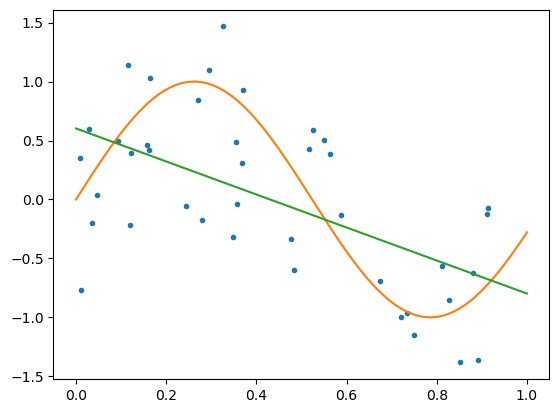

In [10]:
plt.plot(Xs,Ys,'.')
plt.plot(xs,ys)
plt.plot(xs2, ys2)
plt.show()

(6) Repeat the computation of the coefficients, using now the function `numpy.linalg.lstsq` . Check on the plot that the results are the same.

In [11]:
X = np.array([np.ones(n),Xs]).T

In [12]:
theta,_,_,_ = np.linalg.lstsq(X,Ys, rcond=None)

In [13]:
ys3 = X@theta

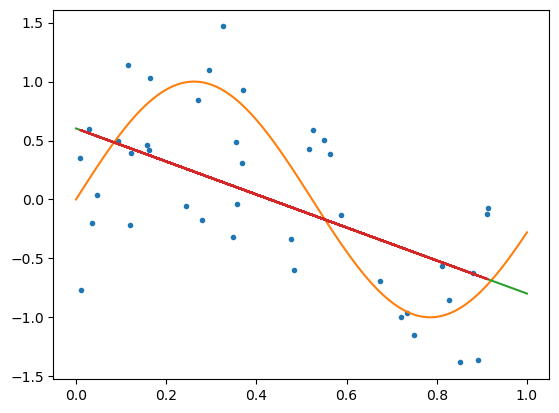

In [14]:
plt.plot(Xs,Ys,'.')
plt.plot(xs,ys)
plt.plot(xs2,ys2)
plt.plot(Xs,ys3)
plt.show()

(7) Minimize the empirical risk over the set of polynomials of order 2. Plot the optimal polynomial.

In [15]:
X = np.array([np.ones(n),Xs,Xs**2]).T
theta,_,_,_ = np.linalg.lstsq(X,Ys, rcond=None)
ys4 = (np.array([np.ones(100),xs,xs**2]).T)@theta

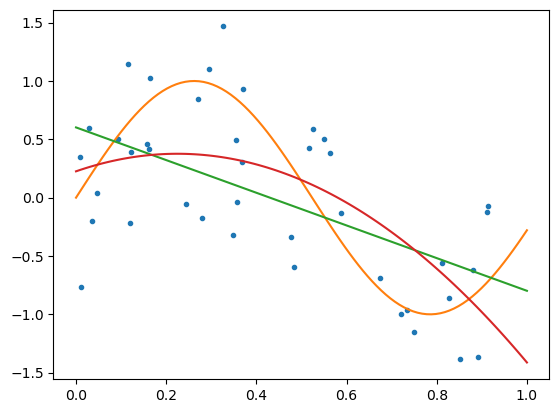

In [16]:
plt.plot(Xs,Ys,'.')
plt.plot(xs,ys)
plt.plot(xs2,ys2)
plt.plot(xs,ys4)
plt.show()

(8) Generalize your code in order to compute the optimal polynomial of order $k$. Vary $k$ and the number of samples $n$, and plot the results. Comment.

In [17]:
def generate_samples(n):
    Xs = np.random.uniform(size=n)
    sigma = 0.5
    Ys = f_star(Xs) + sigma * np.random.randn(n)
    return Xs, Ys

def opt_pol(Xs, Ys, k):   
    X = np.array([Xs**j for j in range(k+1)]).T
    theta,_,_,_ = np.linalg.lstsq(X,Ys, rcond=None)
    return theta, np.linalg.norm(Ys-X@theta)**2

def plot(Xs, Ys, theta):
    xs = np.linspace(0,1,100)
    ys = f_star(xs)
    ys_est = (np.array([xs**j for j in range(len(theta))]).T)@theta
    plt.plot(Xs, Ys, '.')
    plt.plot(xs, ys)
    plt.plot(xs, ys_est)
    plt.ylim(-2,2)
    plt.show()

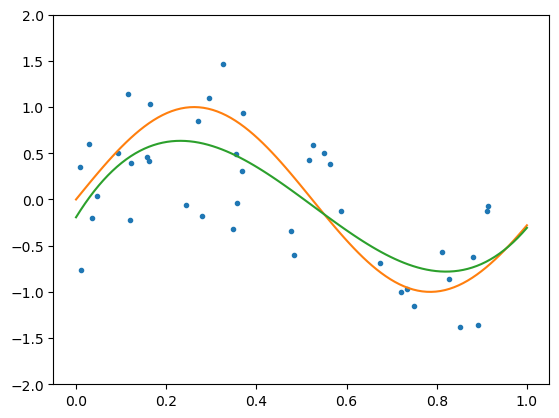

In [18]:
theta, _ = opt_pol(Xs, Ys,3)
plot(Xs, Ys, theta)

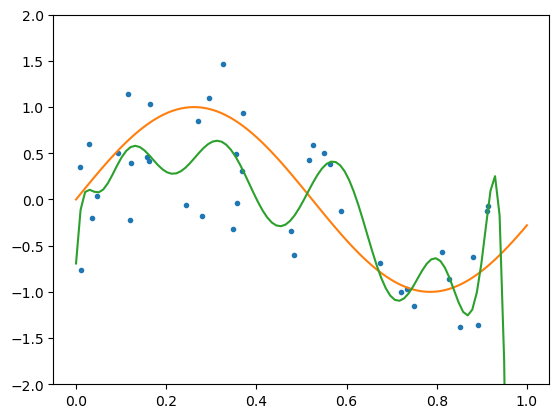

In [19]:
theta, _ = opt_pol(Xs, Ys, 12)
plot(Xs, Ys, theta)

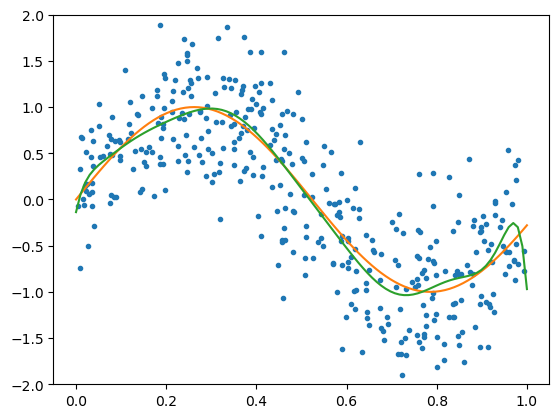

In [20]:
n = 400
Xs, Ys = generate_samples(n)
theta, _ = opt_pol(Xs, Ys, 12)
plot(Xs, Ys, theta)

In [21]:
x = 0.5
np.array([x**j for j in range(4)])

array([1.   , 0.5  , 0.25 , 0.125])

We overfit the data if we allow too large polynomials. This can be compensated by increasing the sample size. Thus the complexity of the function class we can allow depends on the number of samples we have.

(9) Let us denote $\hat{f}_k$ the minimizer of the empirical risk over the polynomials of order $k$. Plot the risk $R(\hat{f}_k)$ and the empirical risk $\hat{R}_n(\hat{f}_k)$ as a function of $k$, for $n=40$ and $n=400$. Comment.

In [22]:
def risk(theta, sigma):
    def f(x):
        return theta@np.array([x**j for j in range(len(theta))])
    nb_points = 100
    mesh = np.linspace(0,1,nb_points)
    return sigma**2 + np.sum((f_star(mesh)-f(mesh))**2)/nb_points

#### With $n = 40$ samples

In [23]:
n = 40
Xs, Ys = generate_samples(n)

k_max = 15
risks = np.zeros(k_max+1)
emp_risks = np.zeros(k_max+1)
for k in range(k_max+1):
    theta, opt_value = opt_pol(Xs, Ys, k)
    emp_risks[k] = opt_value/len(Ys)
    risks[k] = risk(theta, sigma)

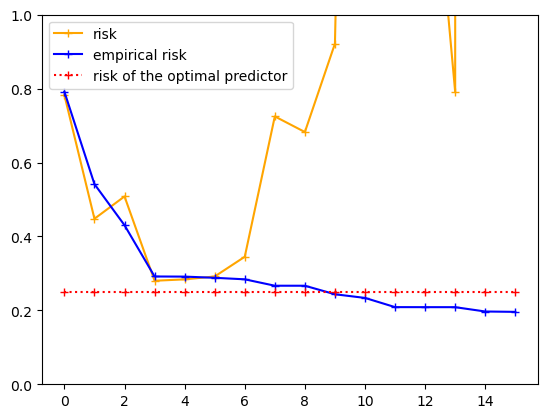

In [24]:
plt.plot([k for k in range(k_max+1)], risks, color = 'orange', marker = '+', label='risk')
plt.plot([k for k in range(k_max+1)], emp_risks, color = 'blue', marker = '+', label = 'empirical risk')
plt.plot([k for k in range(k_max+1)], [sigma**2 for k in range(k_max+1)], color = 'red', marker = '+', linestyle = ':', label = 'risk of the optimal predictor')
plt.legend()
plt.plot()
plt.ylim(0,1)
plt.show()

#### With $n = 400$ samples

In [25]:
n = 400
Xs, Ys = generate_samples(n)

k_max = 15
risks = np.zeros(k_max+1)
emp_risks = np.zeros(k_max+1)
for k in range(k_max+1):
    theta, opt_value = opt_pol(Xs, Ys, k)
    emp_risks[k] = opt_value/len(Ys)
    risks[k] = risk(theta, sigma)

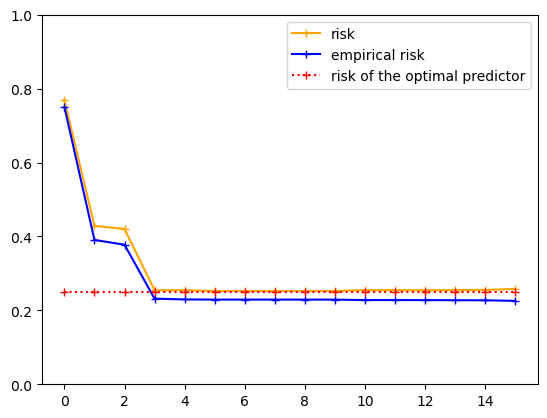

In [26]:
plt.plot([k for k in range(k_max+1)], risks, color = 'orange', marker = '+', label='risk')
plt.plot([k for k in range(k_max+1)], emp_risks, color = 'blue', marker = '+', label = 'empirical risk')
plt.plot([k for k in range(k_max+1)], [sigma**2 for k in range(k_max+1)], color = 'red', marker = '+', linestyle = ':', label = 'risk of the optimal predictor')
plt.legend()
plt.plot()
plt.ylim(0,1)
plt.show()

- The empirical risk decreases a function of $k$. Indeed, we minimize the same function on increasing sets, thus the optimal value decreases.
- The true risk decreases in a first phase, and increases in a second phase. The first phase is called underfitting, while the other one is called overfitting. When there is overfitting, the empirical risk is no longer a good approximation of the risk. Overfitting occurs when the number $n$ of samples is too low, and when the complexity of the class of regression functions (i.e. the maximum degree $k$) is too large. 

(10) Repeat question (8) and (9) with $f_*(x) = 1.2x + 4x^2 + 4.4x^3 - 3.8x^4 + 3.6 x^5$ and $n=20$.

In [27]:
def f_star(x):
    return -1*x - 4*x**2 + 4.4*x**3 - 3.8*x**4 + 3.6*x**5

Xs, Ys = generate_samples(20)

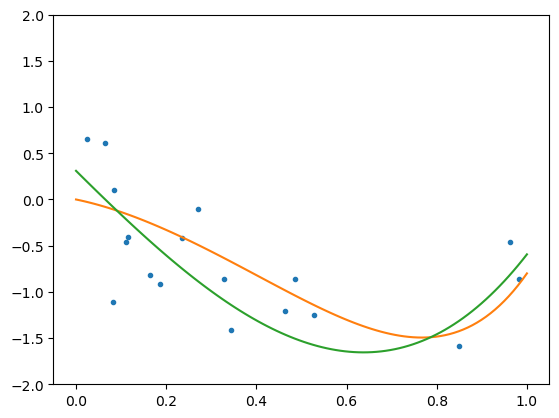

In [28]:
theta, _ = opt_pol(Xs, Ys,3)
plot(Xs, Ys, theta)

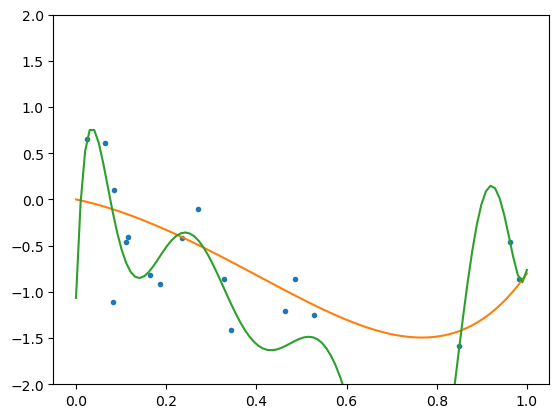

In [29]:
theta, _ = opt_pol(Xs, Ys, 9)
plot(Xs, Ys, theta)

In [30]:
k_max = 15
risks = np.zeros(k_max+1)
emp_risks = np.zeros(k_max+1)
for k in range(k_max+1):
    theta, opt_value = opt_pol(Xs, Ys, k)
    emp_risks[k] = opt_value/len(Ys)
    risks[k] = risk(theta, sigma)

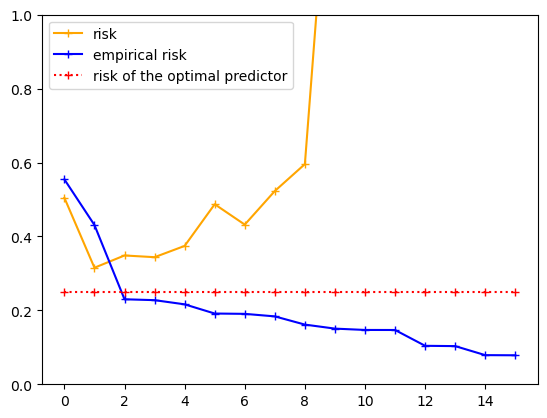

In [31]:
plt.plot([k for k in range(k_max+1)], risks, color = 'orange', marker = '+', label='risk')
plt.plot([k for k in range(k_max+1)], emp_risks, color = 'blue', marker = '+', label = 'empirical risk')
plt.plot([k for k in range(k_max+1)], [sigma**2 for k in range(k_max+1)], color = 'red', marker = '+', linestyle = ':', label = 'risk of the optimal predictor')
plt.legend()
plt.plot()
plt.ylim(0,1)
plt.show()

Note that although the optimal predictor $f_*$ is a polynomial of degree 5, we get a better estimate by minimizing the empirical risk over the set of polynomials of degree 3, rather than over the set of polynomials of degree 5. This is a general principle: in machine learning, we will not care so much if the optimal predictor is in our hypothesis class. We will seek an hypothesis class that approximates well the optimal predictor, but also that is of low complexity.

## Linear and polynomial classifiers

In [32]:
data_train = pd.read_csv('./classification_data/classificationA_train', header=None, sep='\t')
data_train = data_train.rename(columns = {0:'x', 1:'y', 2:'class'})
data_test = pd.read_csv('./classification_data/classificationA_test', header=None, sep='\t')
data_test = data_test.rename(columns = {0:'x', 1:'y', 2:'class'})
data_train.head()

,x,y,class
0,-3.603405,1.3266,1.0
1,-4.219011,2.0150,1.0
2,-1.515658,0.5059,1.0
3,-1.169757,0.3815,1.0
4,0.522741,-0.6572,1.0


In [33]:
data0_train = data_train.loc[data_train['class'] == 0]
x0_train = np.array(data0_train['x'])
y0_train = np.array(data0_train['y'])
data1_train = data_train.loc[data_train['class'] == 1]
x1_train = np.array(data1_train['x'])
y1_train = np.array(data1_train['y'])

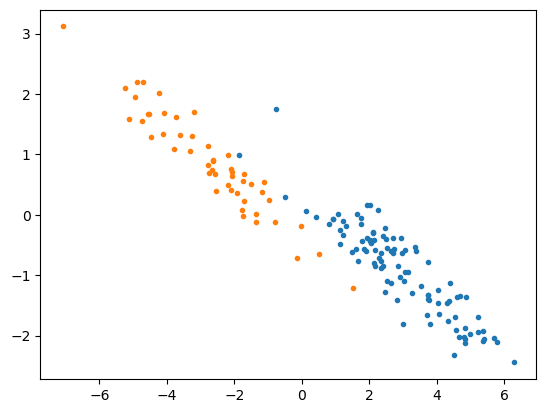

In [34]:
plt.plot(x0_train,y0_train,'.')
plt.plot(x1_train,y1_train,'.')
plt.show()

In [35]:
data0_test = data_test.loc[data_test['class'] == 0]
x0_test = np.array(data0_test['x'])
y0_test = np.array(data0_test['y'])
data1_test = data_test.loc[data_test['class'] == 1]
x1_test = np.array(data1_test['x'])
y1_test = np.array(data1_test['y'])

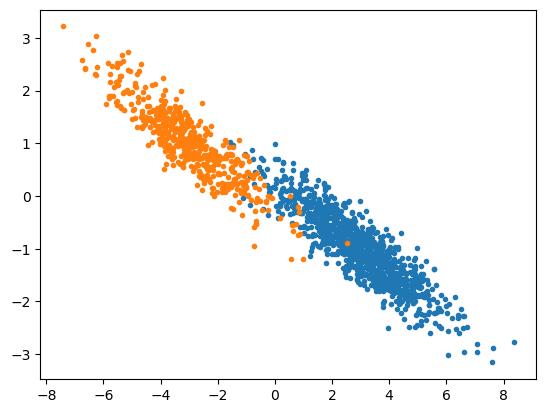

In [36]:
plt.plot(x0_test,y0_test,'.')
plt.plot(x1_test,y1_test,'.')
plt.show()

We want to build a classifier using that train dataset `classification1_train` and that will perform well on the test dataset `classification1_test`. To this end, we map the classification problem into a regression problem: we seek a function $f$ that maps $(x,y)$ onto its class $c \in {0,1}$. In practice, we will allow $f$ to take real values and will predict class $1$ iif $f(x,y) \geq 1/2$. 

To build the function $f$, we seek to minimize the empirical risk 
$$ \hat{R}_n(f) = \frac{1}{n}\sum_{i=1}^{n}(f(x_i,y_i)-c_i)^2 $$
over the set of linear classifier $f$. 

(11) Compute the estimator 
$$ \hat{f} = {\rm argmin}_{f{\rm \, linear}} \hat{R}_n(f) \, .$$
Plot the resulting frontier $f(x,y) = 1/2$ over the train dataset.

In [37]:
X = np.ones(data_train.shape)
X[:,1:] = np.array(data_train[['x','y']])
y = data_train['class']
theta, _, _, _ = np.linalg.lstsq(X, y, rcond=None)

In [38]:
xlim = np.array([-10,10])
ylim = 1/theta[2]*(1/2-theta[1]*xlim-theta[0])

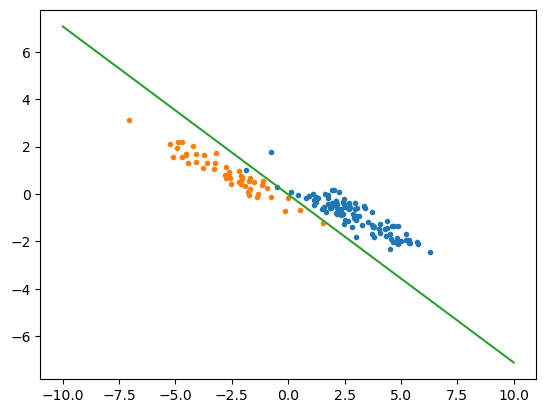

In [39]:
plt.plot(x0_train,y0_train,'.')
plt.plot(x1_train,y1_train,'.')
plt.plot(xlim,ylim,scaley=False)
plt.show()

(12) Produce the same plot for the test dataset. Compute the error of the linear classifier over the test dataset. Do you think there exists a better classifier?

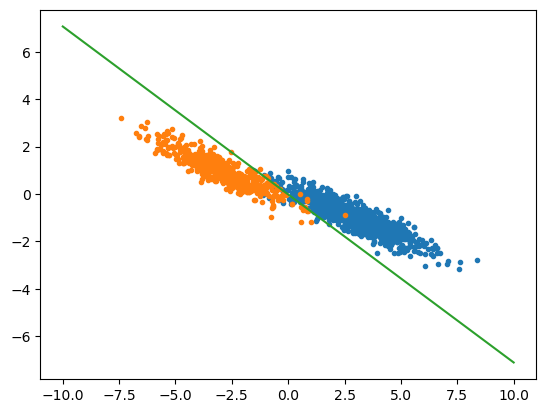

In [40]:
plt.plot(x0_test,y0_test,'.')
plt.plot(x1_test,y1_test,'.')
plt.plot(xlim,ylim,scaley=False)
plt.show()

In [41]:
X_test = np.ones(data_test.shape)
X_test[:,1:] = np.array(data_test[['x','y']])
pred = X_test@theta
performance = sum((pred >1/2) == data_test['class'])/len(pred)
print('The error on the test dataset is {0}%.'.format(performance*100))

The error on the test dataset is 97.93333333333332%.


(13) Repeat the experiments with the datasets `classificationB` and `classificationC`. What is the situation now?

Simply run again the code above with the other datasets. The linear classifiers seems to be a bad choice for these datasets. We would like to allow for curvy frontiers.

(14) Add quadratic features to allow for a larger type of classification rules. What is the mathematical set of possible frontiers? How does the performance evolve?

The frontiers that can appear are exactly the conics.

In [42]:
X = np.ones((data_train.shape[0],6))
X[:,1:3] = np.array(data_train[['x','y']])
X[:,3] = np.array(data_train['x'])**2
X[:,4] = np.array(data_train['y'])**2
X[:,5] = np.array(data_train['x']) * np.array(data_train['y'])
y = data_train['class']
theta, _, _, _ = np.linalg.lstsq(X, y, rcond=None)

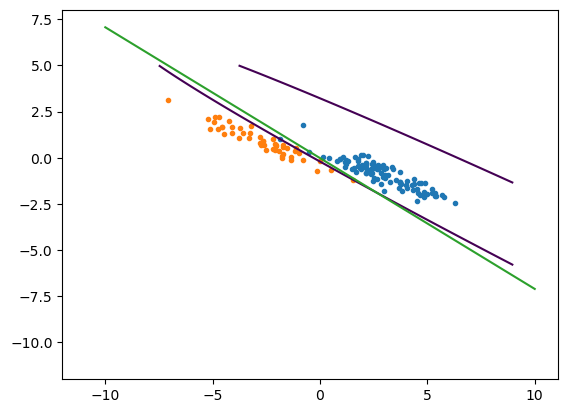

In [43]:
plt.plot(x0_train,y0_train,'.')
plt.plot(x1_train,y1_train,'.')

x = np.linspace(-12, 9, 400)
y = np.linspace(-12, 5, 400)
x, y = np.meshgrid(x, y)
plt.contour(x,y, theta[1]*x + theta[2]*y + theta[3]*x**2 + theta[4]*y**2 + theta[5]*x*y, [1/2-theta[0]])
plt.plot(xlim,ylim,scaley=False)
plt.show()

In [44]:
X_test = np.ones((data_test.shape[0],6))
X_test[:,1:3] = np.array(data_test[['x','y']])
X_test[:,3] = np.array(data_test['x'])**2
X_test[:,4] = np.array(data_test['y'])**2
X_test[:,5] = np.array(data_test['x']) * np.array(data_test['y'])
pred = X_test@theta
performance = sum((pred >1/2) == data_test['class'])/len(pred)
print('The error on the test dataset is {0}%.'.format(performance*100))

The error on the test dataset is 96.86666666666667%.


We assume that the data $(X,Y)$ has been generated according to the following process:
- $Y$ is a Bernoulli random variable with parameter $p$,
- conditionally on $Y = 1$, $X$ is a random variable in $\mathbb{R}^2$ with density $p_1(x)$ (with respect to the Lesbegue measure), and conditionally on $Y = 0$, $X$ is a random variable with density $p_0(x)$.

(15) What is the predictor $f_*:\mathbb{R}^2 \to \{0,1\}$ minimizing the error $\mathcal{E}(f) = \mathbb{P}\left(f(X) \neq Y\right)$? (in terms of $p$, $p_0$ and $p_1$)

\begin{align*}
\mathcal{E}(f) &= \mathbb{P}(Y = 1) \mathbb{P}(f(X) = 0 | Y = 1) + \mathbb{P}(Y = 0) \mathbb{P}(f(X) = 1 | Y = 0) \\
&= p \int \mathbb{1}_{\{f(x)=0\}}p_1(x)\mathrm{d}x + (1-p) \int \mathbb{1}_{\{f(x)=1\}}p_0(x)\mathrm{d}x \\
&= \int \left( p\mathbb{1}_{\{f(x)=0\}}p_1(x) + (1-p) \int \mathbb{1}_{\{f(x)=1\}}p_0(x) \right) \mathrm{d}x \, .
\end{align*}
This is minimized with 
\begin{equation*}
f_*(x) = \mathbb{1}_{\{pp_1(x) > (1-p)p_0(x)\}} \, .
\end{equation*}

(16) Assume that the laws of $X$ conditionally on $Y$ are Gaussian with the same covariance, namely
\begin{align*}
&X \, | \, Y = 0 \sim \mathcal{N}(\mu_0,\Sigma) \, ,
&&X \, | \, Y = 1 \sim \mathcal{N}(\mu_1,\Sigma) \, .
\end{align*}
What is the frontier built by the optimal predictor?

\begin{align*}
pp_1(x) = (1-p)p_0(x) \quad &\Leftrightarrow \quad p\exp\left(-\frac{(x-\mu_1)^T\Sigma^{-1}(x-\mu_1)}{2}\right) = (1-p) \exp \left(-\frac{(x-\mu_0)^T\Sigma^{-1}(x-\mu_0)}{2}\right) \\
&\Leftrightarrow \quad x^T\Sigma^{-1}(\mu_1-\mu_0) = \log \frac{1-p}{p} \, .
\end{align*}
The frontier is a line.

(17) Assume that the laws of $X$ conditionally on $Y$ are Gaussian with the same covariance, namely
\begin{align*}
&X \, | \, Y = 0 \sim \mathcal{N}(\mu_0,\Sigma_0) \, ,
&&X \, | \, Y = 1 \sim \mathcal{N}(\mu_1,\Sigma_1) \, .
\end{align*}
What is the frontier built by the optimal predictor?

\begin{align*}
pp_1(x) = (1-p)p_0(x) \quad &\Leftrightarrow \quad \frac{p}{\sqrt{\det \Sigma_1}}\exp\left(-\frac{(x-\mu_1)^T\Sigma_1^{-1}(x-\mu_1)}{2}\right) = \frac{1-p}{\sqrt{\det \Sigma_0}} \exp \left(-\frac{(x-\mu_0)^T\Sigma_0^{-1}(x-\mu_0)}{2}\right) \\
&\Leftrightarrow \quad  -\frac{(x-\mu_1)^T\Sigma_1^{-1}(x-\mu_1)}{2} + \frac{(x-\mu_0)^T\Sigma_0^{-1}(x-\mu_0)}{2} = \log \frac{1-p}{p} + \frac{1}{2} \log \frac{\det \Sigma_1}{\det \Sigma_0} \, .
\end{align*}
The frontier is a conic.

## Linear and polynomial classification on the MNIST dataset

In [45]:
data = sio.loadmat('mnist_digits.mat')

In [46]:
data_x = data['x'] 
data_x = data_x 
data_y = data['y']
print(data_x.shape)

(66000, 784)


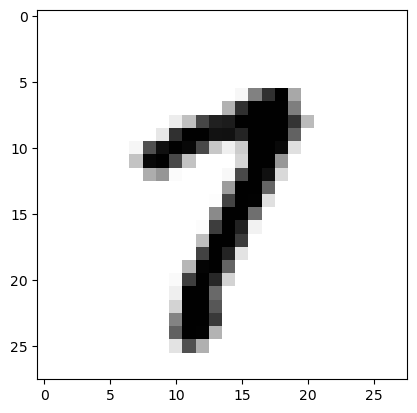

In [47]:
i = np.random.randint(len(data['x']))
plt.imshow(np.reshape(data_x[i],(28,28)), cmap='binary')
plt.show()

(18) Open question: choose two digits and train a classifier that distinguishes the two digits using the methods seen in this TD. 

Make sure that you divide the dataset into training and test sets to be able to evaluate the performance of your algorithms. 

Add noise to the images and repeat the experiments

In [48]:
data_y2 = data_y.reshape((data_y.shape[0],))

# select only the 0s and the 1s
indices = np.argwhere((data_y2 == 7) + (data_y2 == 9))[:,0]
x = data_x[indices]
y = data_y2[indices]

# shuffle the data
n = y.shape[0]
perm = np.random.permutation(n)
x2 = x[perm]
y2 = y[perm]

# separate train and test
alpha = 0.002
sep = int(n*alpha)
print('On prend {} echantillons'.format(sep))
x_train = x2[:sep] 
x_test = x2[sep:]
y_train = y2[:sep]
y_test = y2[sep:]

# add noise to the data
sigma = 0
x_train += sigma*np.random.randn(x_train.shape[0], x_train.shape[1])
x_test += sigma*np.random.randn(x_test.shape[0], x_test.shape[1])

On prend 26 echantillons


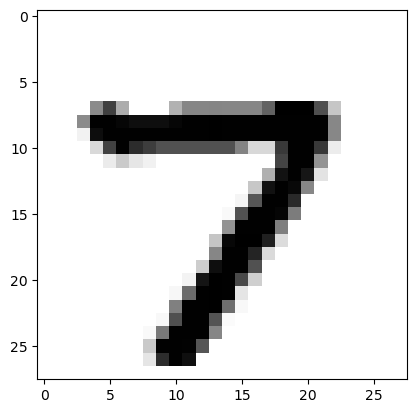

In [49]:
i = np.random.randint(len(x_train))
plt.imshow(np.reshape(x_train[i],(28,28)), cmap='binary')
plt.show()

In [50]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(26, 784) (13418, 784) (26,) (13418,)


Linear regression on the pixels:

In [51]:
X = np.ones((x_train.shape[0],x_train.shape[1]+1))
X[:,1:] = x_train
theta, _, _, _ = np.linalg.lstsq(X, y_train, rcond = None)

In [52]:
# evaluation on the train set 
X = np.ones((x_train.shape[0],x_train.shape[1]+1))
X[:,1:] = x_train
perf = sum((y_train >= 8) == (X@theta >= 8))/len(y_train)
print(perf)

1.0


In [53]:
# evaluation on the test set 
X = np.ones((x_test.shape[0],x_test.shape[1]+1))
X[:,1:] = x_test
perf = sum((y_test >= 8) == (X@theta >= 8))/len(y_test)
print(perf)
print(np.linalg.norm(y_test - X@theta))

0.6433894768221792
232.215762228202
